In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### No of values for each quality 

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

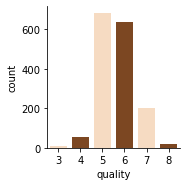

In [8]:
colors=sns.color_palette(['#FFDAB9', '#8B4513'])
sns.catplot(x='quality',data=df,kind='count',height=2.5,palette=colors)

#### Data Visualisation to find proportionality of various chemicals with quality column

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

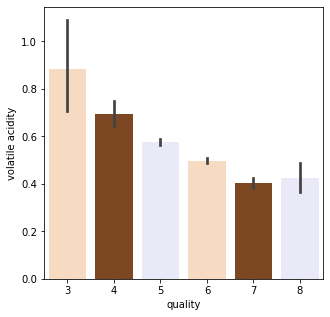

In [9]:
plot=plt.figure(figsize=(5,5))
colors = ['peachpuff', 'saddlebrown', 'lavender']
sns.barplot(x='quality',y='volatile acidity',data=df,palette=colors)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

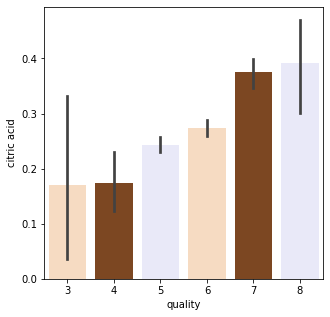

In [10]:
plot=plt.figure(figsize=(5,5))
colors = ['peachpuff', 'saddlebrown', 'lavender']
sns.barplot(x='quality',y='citric acid',data=df,palette=colors)

#### Construction a heat map to find correlations between columns.

In [11]:
correlation=df.corr()

<AxesSubplot:>

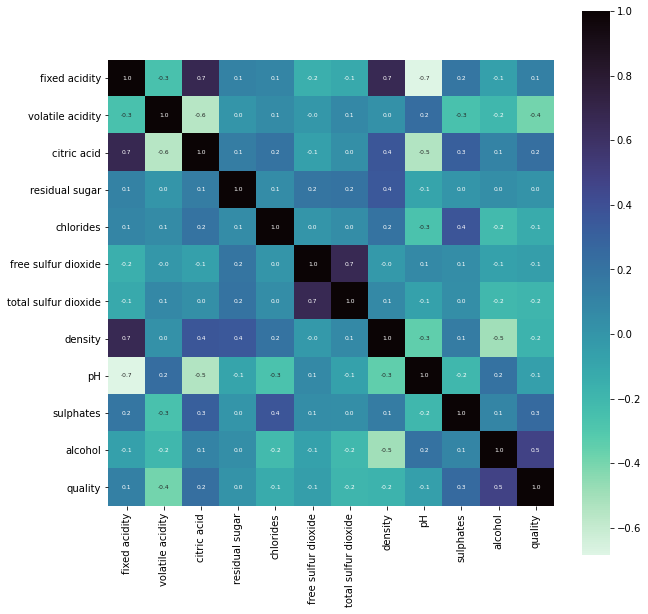

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot_kws={'size':6},annot=True,cmap='mako_r')

In [13]:
X=df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Label Binarisation

In [14]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train and test split 

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state=2)
                                        

In [17]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


In [18]:
# using random forest classifier algorithm 

model=RandomForestClassifier()

In [19]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [22]:
print('accuracy of training model:',training_data_accuracy)

accuracy of training model: 1.0


In [24]:
X_test_prediction= model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [26]:
print('accuracy of testing model:',training_data_accuracy)

accuracy of testing model: 1.0


## Building a Predictive System

In [28]:
input_data=(7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)

input_data_as_array=np.array(input_data)

reshaped_input=input_data_as_array.reshape(1,-1)

prediction=model.predict(reshaped_input)
print(prediction)

[0]


In [29]:
if (prediction[0]==0):
    print('Qulaity of wine is bad')
else:
    print('Quality of wine is good')

Qulaity of wine is bad
